<AxesSubplot: xlabel='n', ylabel='word'>

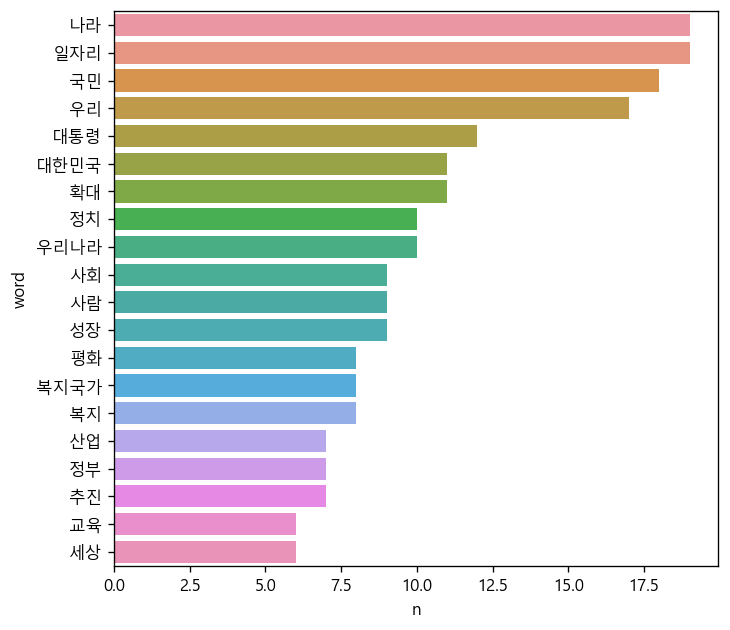

In [7]:
spe = open('speech_moon.txt', encoding='UTF-8').read()
import re
spe = re.sub('[^가-힣]',' ',spe)

import konlpy
han = konlpy.tag.Hannanum()
nouns = han.nouns(spe)

import pandas as pd
df_word = pd.DataFrame({'word':nouns})
df_word['count']=df_word['word'].str.len()
df_word=df_word.query('count>=2')
df_word.sort_values('count')
df_word = df_word.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)

top20 = df_word.head(20)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})
sns.barplot(data=top20, y='word', x='n')



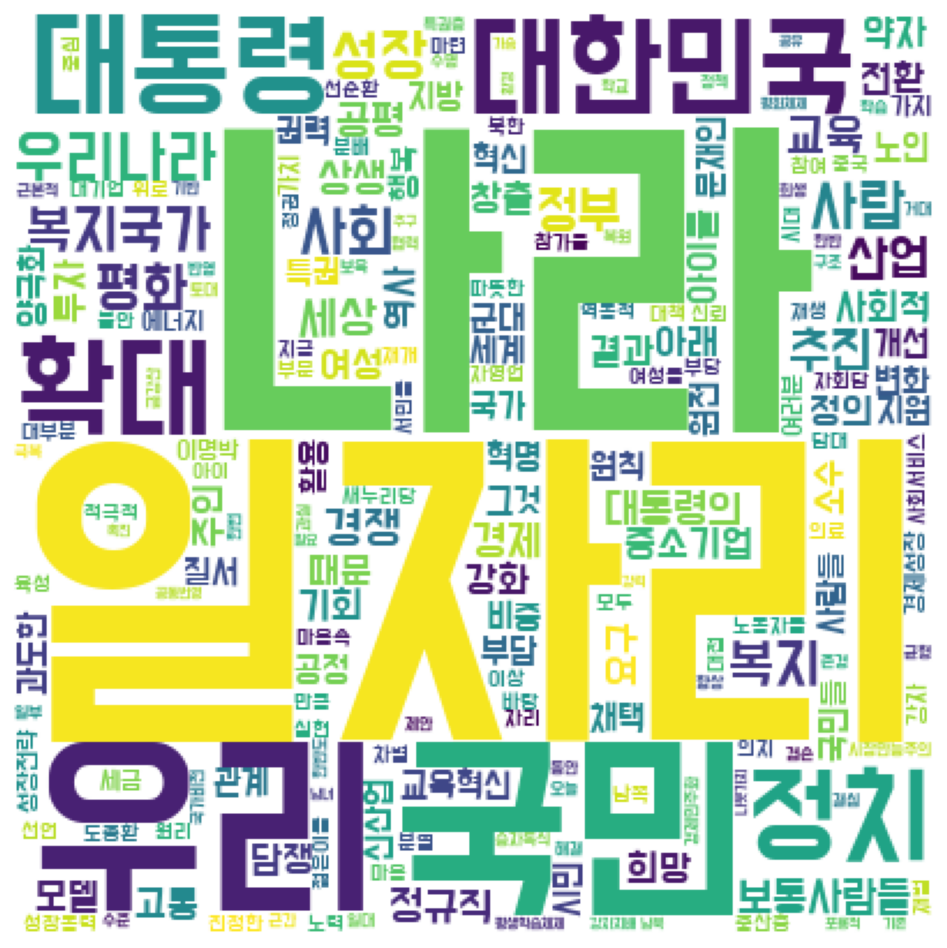

In [11]:
spe = open('speech_moon.txt', encoding='UTF-8').read()
import re
spe = re.sub('[^가-힣]',' ',spe)

import konlpy
han = konlpy.tag.Hannanum()
nouns = han.nouns(spe)

import pandas as pd
df_word = pd.DataFrame({'word':nouns})
df_word['count']=df_word['word'].str.len()
df_word=df_word.query('count>=2')
df_word.sort_values('count')
df_word = df_word.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)

font='DoHyeon-Regular.ttf'
dic_word = df_word.set_index('word').to_dict()['n']

from wordcloud import WordCloud
wc=WordCloud(random_state=1234,
             font_path=font,
             width=400,
             height=400,
             background_color='white')
import seaborn as sns
import matplotlib.pyplot as plt
img_wordcloud=wc.generate_from_frequencies(dic_word)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_wordcloud)

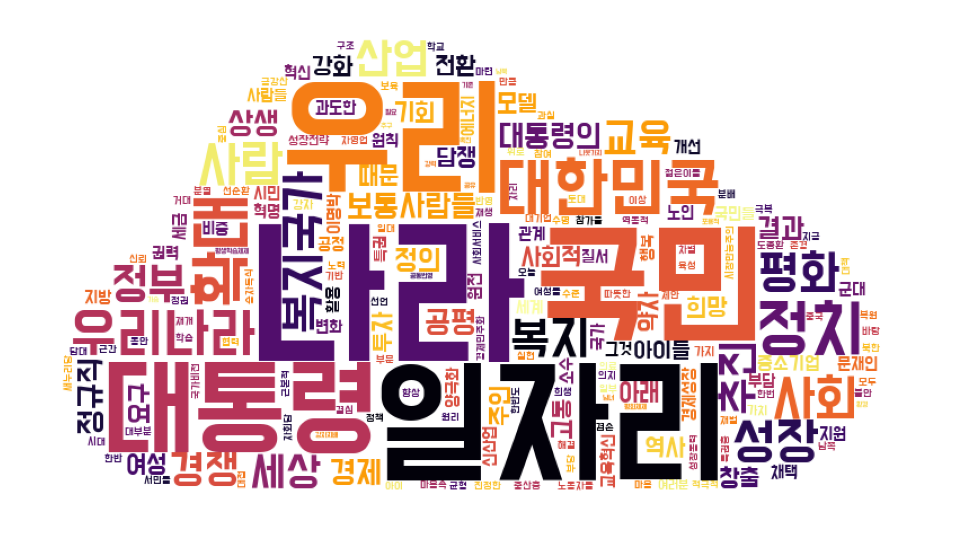

In [16]:
spe = open('speech_moon.txt', encoding='UTF-8').read()
import re
spe = re.sub('[^가-힣]',' ',spe)

import konlpy
han = konlpy.tag.Hannanum()
nouns = han.nouns(spe)

import pandas as pd
df_word = pd.DataFrame({'word':nouns})
df_word['count']=df_word['word'].str.len()
df_word=df_word.query('count>=2')
df_word.sort_values('count')
df_word = df_word.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)

font='DoHyeon-Regular.ttf'
dic_word = df_word.set_index('word').to_dict()['n']
import PIL
icon=PIL.Image.open('cloud.png')
import numpy as np
img=PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img=np.array(img)

from wordcloud import WordCloud
wc=WordCloud(random_state=1234,
             font_path=font,
             width=400,
             height=400,
             background_color='white',
             mask=img,
             colormap='inferno')
import matplotlib.pyplot as plt
#워드 클라우드 생성
img_wordcloud=wc.generate_from_frequencies(dic_word)
plt.figure(figsize=(10,10)) #가로 세로 크기
plt.axis('off') #테두리 선 없애기
plt.imshow(img_wordcloud) #워드 클라우드 출력


In [ ]:
df=pd.read_csv('news_comment_BTS.csv',encoding='UTF-8')
df['reply']=df['reply'].str.replace('[^가-힣]',' ',regex=True)

import konlpy
#띄어쓰기 오류있을 때도 형태소 잘 추출하는 형태소 분석기
kkma=konlpy.tag.Kkma()
nouns=df['reply'].apply(kkma.nouns)
#한 행에 한 단어만 들어가도록
nouns=nouns.explode()


